This notebook should be used for computing and displaying the average spherulite distribution of polarized optical microscope (POM) images grouped by the light intensity, thickness, and photoabsorber concentration. It can also plot the general crystallinity trends such as the variation of the median radius of spherulites and the percent crystallinity with processing parameters such as light intensity.

## Table of Contents:
1. Average Spherulite Distribution Computation
2. Variation of Median Radius with Light Intensity
3. Variation of Percent Crystallinity with Light Intensity

## Average Spherulite Distribution Computation

The average crystallite size distribution (measured as the radial segment length of a spherulite) of the samples grouped by processing parameters is calculated by weighing the distribution of each sample with the segmentation quality score and averaging by the number of samples in each group.

The processing parameters are as follows:
- Light intensity ($mW/cm^2$) = 2.7, 4.0, 6.0, 10.0
- Thickness ($\mu m$) = 50, 150
- Photoabsorber concentration (wt \%) = 0.0, 0.1

### Distributions for 50 $\mu m$ samples

#### Distribution for 50 $\mu m$, 10.0 $mW/cm^{2}$, 0.1 wt \% of Sudan I

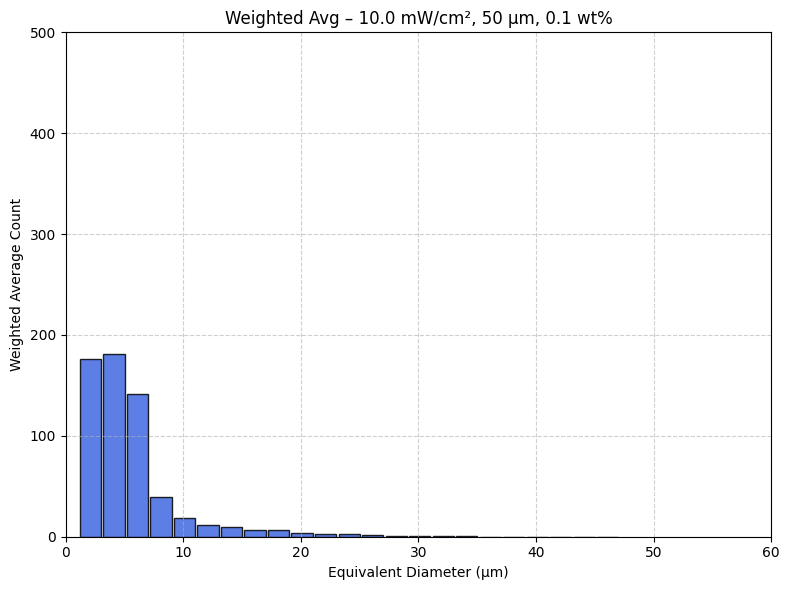

In [1]:
import sys
sys.path.append("../../src")  # Ensure Python finds the module

from regression.average_distribution import plot_weighted_group_distribution

plot_weighted_group_distribution(
    thickness=50,
    light_intensity=10.0,
    photoabsorber=0.1,
    bin_width=2.0
)


#### Distribution for 50 $\mu m$, 6.0 $mW/cm^{2}$, 0.1 wt \% of Sudan I

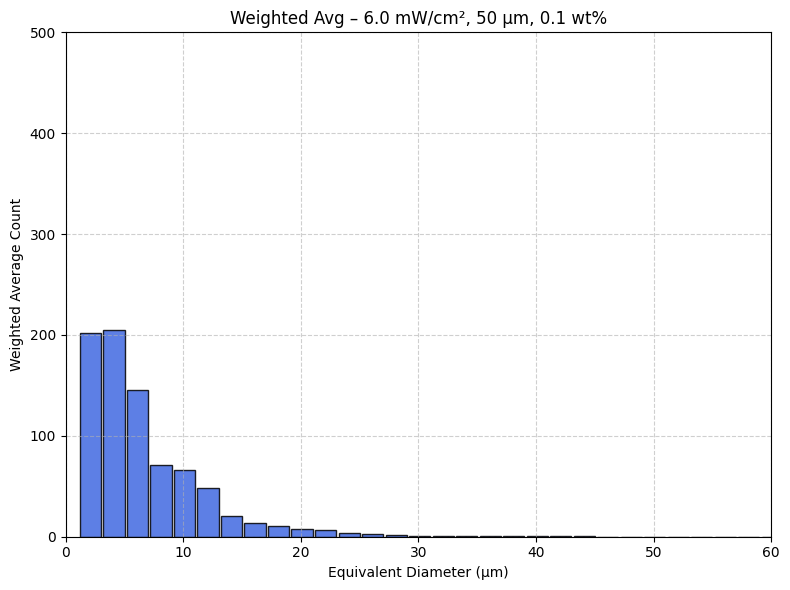

In [2]:
plot_weighted_group_distribution(
    thickness=50,
    light_intensity=6.0,
    photoabsorber=0.1,
    bin_width=2.0
)

#### Distribution for 50 $\mu m$, 4.0 $mW/cm^{2}$, 0.1 wt \% of Sudan I

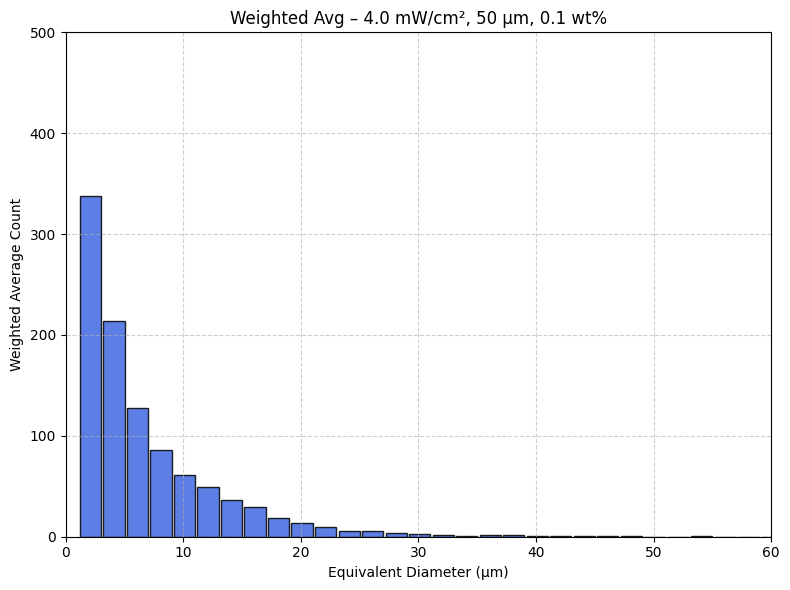

In [3]:
plot_weighted_group_distribution(
    thickness=50,
    light_intensity=4.0,
    photoabsorber=0.1,
    bin_width=2.0
)

#### Distribution for 50 $\mu m$, 2.7 $mW/cm^{2}$, 0.1 wt \% of Sudan I

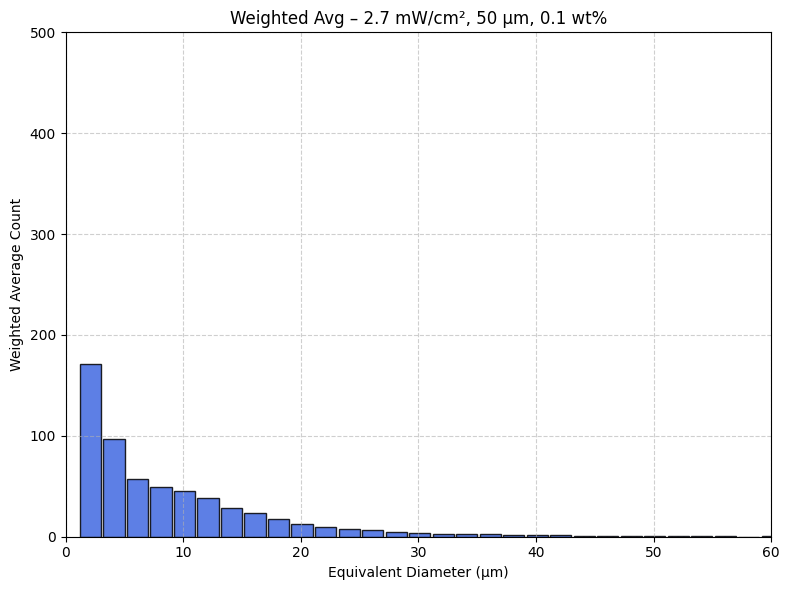

In [4]:
plot_weighted_group_distribution(
    thickness=50,
    light_intensity=2.7,
    photoabsorber=0.1,
    bin_width=2.0
)

#### Distribution for 50 $\mu m$, 2.7 $mW/cm^{2}$, 0.0 wt \% of Sudan I

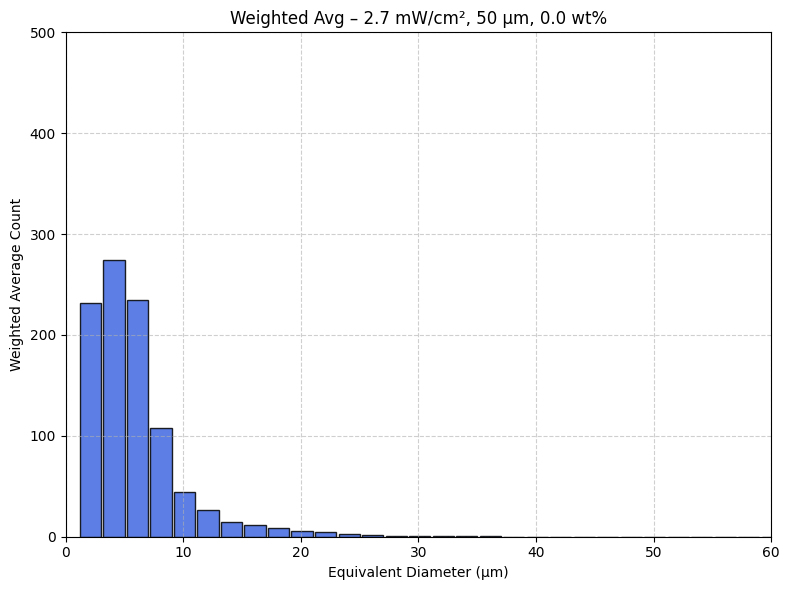

In [5]:
plot_weighted_group_distribution(
    thickness=50,
    light_intensity=2.7,
    photoabsorber=0.0,
    bin_width=2.0
)

### Distributions for 150 $\mu m$ samples

#### Distribution for 150 $\mu m$, 10.0 $mW/cm^{2}$, 0.1 wt \% of Sudan I

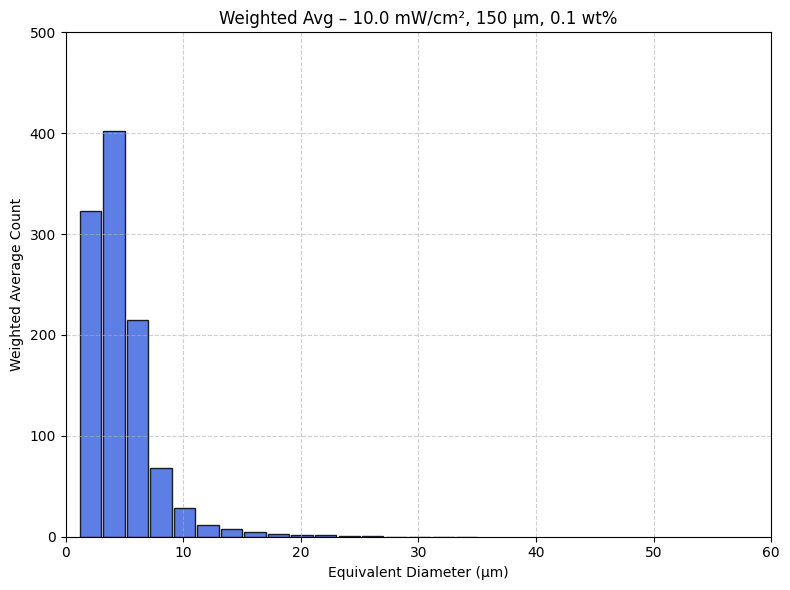

In [6]:
plot_weighted_group_distribution(
    thickness=150,
    light_intensity=10.0,
    photoabsorber=0.1,
    bin_width=2.0
)

#### Distribution for 150 $\mu m$, 6.0 $mW/cm^{2}$, 0.1 wt \% of Sudan I

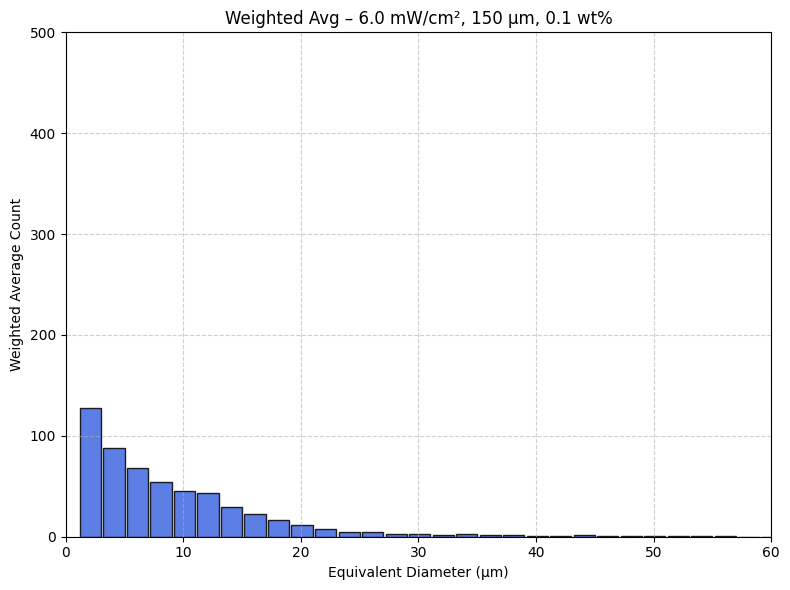

In [7]:
plot_weighted_group_distribution(
    thickness=150,
    light_intensity=6.0,
    photoabsorber=0.1,
    bin_width=2.0
)

#### Distribution for 150 $\mu m$, 2.7 $mW/cm^{2}$, 0.0 wt \% of Sudan I

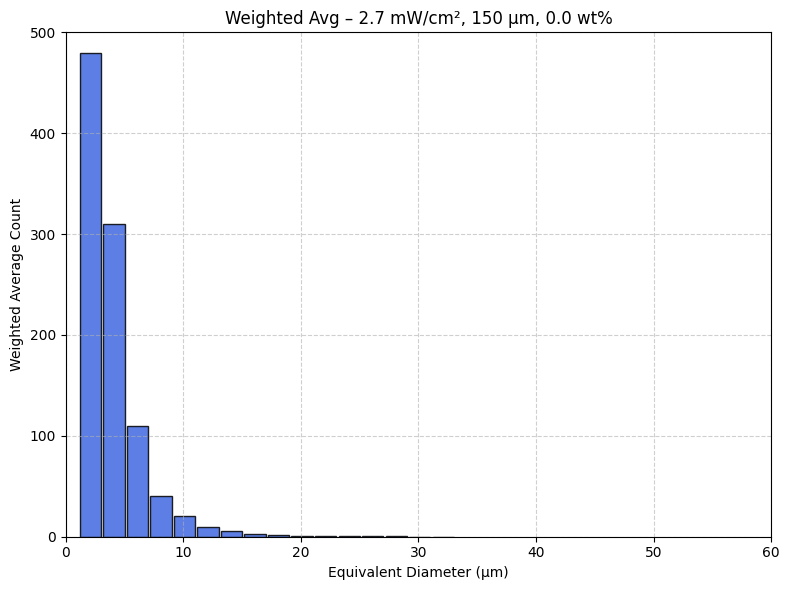

In [8]:
plot_weighted_group_distribution(
    thickness=150,
    light_intensity=2.7,
    photoabsorber=0.0,
    bin_width=2.0
)

## Variation of Median Radius with Light Intensity

In [11]:
import sys
import os

# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Now use absolute paths
summary_csv = os.path.join(project_root, "results/tables/crystallinity_summary_all_images.csv")
plot_output = os.path.join(project_root, "results/figures/median_diameter_vs_light_0.1wt.png")


from src.regression.group_stats import compute_weighted_median_iqr
from src.visualization.plot_crystallinity_trends import plot_group_trend, plot_group_boxplot

group_df = compute_weighted_median_iqr(
    summary_csv_path=summary_csv,
    photoabsorber=0.1
)

plot_group_trend(
    df=group_df,
    x_col="light_intensity",
    y_col="weighted_median",
    yerr_lower_col="iqr_lower",
    yerr_upper_col="iqr_upper",
    group_col="thickness",
    x_label="Light Intensity (mW/cm²)",
    y_label="Radial Segment Length (µm)",
    output_path=plot_output
)

plot_group_boxplot(
    df=group_df,
    x_col="light_intensity",
    y_col="weighted_median",
    group_col="thickness",
    x_label="Light Intensity (mW/cm²)",
    y_label="Radial Segment Length (µm)",
    output_path=os.path.join(project_root, "results/figures/boxplot_diameter.png")
)


✅ Plot saved to c:\Users\priya\Documents\MSU\SS25\CMSE802\cmse802_project\results/figures/median_diameter_vs_light_0.1wt.png
✅ Boxplot saved to c:\Users\priya\Documents\MSU\SS25\CMSE802\cmse802_project\results/figures/boxplot_diameter.png


## Variation of Percent Crystallinity with Light Intensity

In [10]:
from src.regression.group_stats import compute_weighted_crystallinity_percentile_range

group_df = compute_weighted_crystallinity_percentile_range(
    summary_csv_path=summary_csv,
    photoabsorber=0.1,
    lower_pct=0.10,
    upper_pct=0.90
)

plot_group_trend(
    df=group_df,
    x_col="light_intensity",
    y_col="weighted_crystallinity_median",
    yerr_lower_col="crystallinity_iqr_lower",
    yerr_upper_col="crystallinity_iqr_upper",
    group_col="thickness",
    x_label="Light Intensity (mW/cm²)",
    y_label="Percent Crystallinity (%)",
    output_path=os.path.join(project_root, "results/figures/percent_crystallinity_vs_light_iqr.png")
)


✅ Plot saved to c:\Users\priya\Documents\MSU\SS25\CMSE802\cmse802_project\results/figures/percent_crystallinity_vs_light_iqr.png


© 2025 Priyangika Pitawala. All rights reserved.

This notebook contains proprietary and confidential research information. Unauthorized copying, distribution, or disclosure of any part of this document is strictly prohibited.